<a href="https://colab.research.google.com/github/Abdallahyx/Color-Identification/blob/main/Color_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)

%matplotlib inline

In [4]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_img(img_path = None):
  image = get_image(img_path)
  plt.imshow(image)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [5]:
def get_colors(image_path = None, no_of_colors = 10):

  image = get_image(image_path)
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = no_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  # hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i].astype("int") for i in counts.keys()]
  return rgb_colors

In [6]:
def convert_rgb_to_names(image_path=None, no_of_colors=10):
    show_img(image_path)
    rgb_colors = get_colors(image_path,no_of_colors)
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    colors = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    for x in rgb_colors:
      kdt_db = KDTree(rgb_values)
      distance, index = kdt_db.query(x)
      if names[index] not in colors:
        print(names[index])
        colors.append(names[index])

olivedrab
gainsboro
dimgray
silver
darkolivegreen
darkgray
lightslategray
black
darkslategray
lightgray
gray
darkgreen


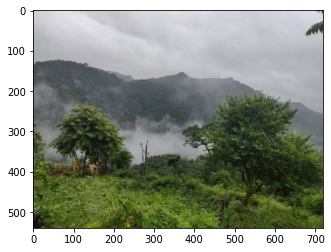

In [11]:
convert_rgb_to_names("/content/1_lSvFUirQRKEI1TKN_BBVFA.webp",20)